In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import qnmfits.qnm as qnm

plt.rcParams.update({
    'font.family': 'serif',
    'font.sans-serif': ['Computer Modern Roman'],
    'text.usetex': True
})

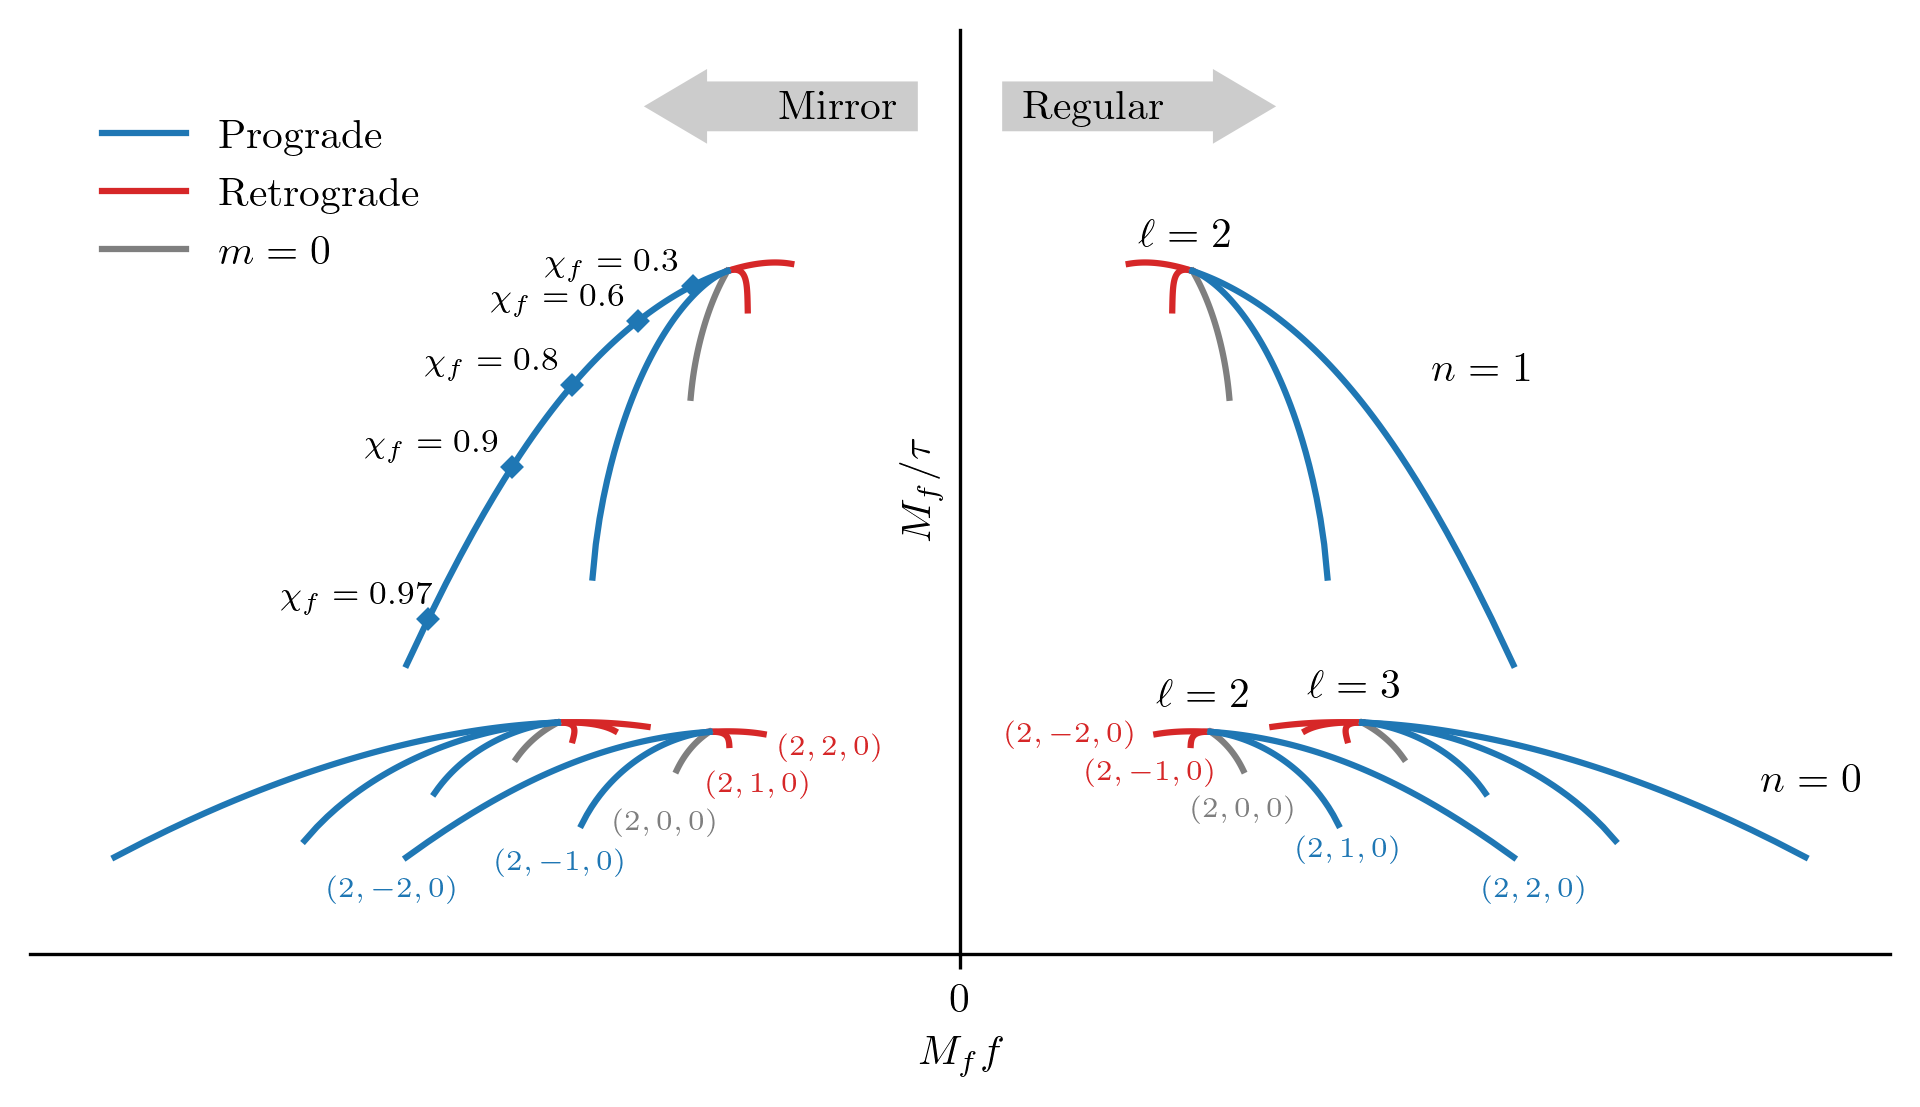

In [2]:
# The range of the dimensionless spin we plot the frequencies for
chi_array = np.arange(0, 0.99, 0.01)

fig, ax = plt.subplots(figsize=(8,4), dpi=300)

ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for n in range(2):
    for l in range(2,4):
        
        if (l==3) & (n==1):
            pass
        
        else:
            for m in range(-l,l+1):
                
                # Colors
                if m < 0:
                    c = 'C3'
                if m == 0:
                    c = 'C7'
                if m > 0:
                    c = 'C0'
                
                # Evaluate the QNM frequencies
                frequencies = qnm.omega(l, m, n, 1, chi_array)
                
                if m==l:
                    # Label the ell group
                    ax.text(
                        np.real(frequencies[0])/(2*np.pi)-0.013, 
                        -np.imag(frequencies[0])+0.01, f'$\ell = {l}$',
                        fontsize=10
                    )
                    
                if (l==2) and (m==2) and (n==1):
                    
                    # Label particular values of spin (we will plot on the 
                    # mirror half for clarity)
                    select_chi_list = [0.3, 0.6, 0.8, 0.9, 0.97]
                    select_freq_list = qnm.omega(l, m, n, 1, select_chi_list)
                    
                    ax.plot(
                        -np.real(select_freq_list)/(2*np.pi), 
                        -np.imag(select_freq_list), 
                        'D', c='C0', markersize=3
                    )
                    
                    for i, chi in enumerate(select_chi_list):
                        freq = select_freq_list[i]
                        ax.text(
                            -np.real(freq)/(2*np.pi)-0.035, 
                            -np.imag(freq)+0.006, 
                            f'$\chi_f = {chi}$', 
                            fontsize=8
                        )
                        
                # Add to the figure
                ax.plot(
                    np.real(frequencies)/(2*np.pi), 
                    -np.imag(frequencies), 
                    c=c
                )
                ax.plot(
                    -np.real(frequencies)/(2*np.pi), 
                    -np.imag(frequencies), 
                    c=c
                )

# Overtone labels
# ---------------

ax.text(0.19, 0.065, '$n=0$', fontsize=10)
ax.text(0.112, 0.23, '$n=1$', fontsize=10)

# (ell,m,n) labels
# ------------------

ax.text(0.011, 0.085, '$(2,-2,0)$', fontsize=7, c='C3')
ax.text(0.03, 0.07, '$(2,-1,0)$', fontsize=7, c='C3')
ax.text(0.055, 0.055, '$(2,0,0)$', fontsize=7, c='C7')
ax.text(0.08, 0.039, '$(2,1,0)$', fontsize=7, c='C0')
ax.text(0.124, 0.023, '$(2,2,0)$', fontsize=7, c='C0')

x_adjust = -0.03
ax.text(-0.013+x_adjust, 0.08, "$(2,2,0)$", fontsize=7, c='C3')
ax.text(-0.03+x_adjust, 0.065, "$(2,1,0)$", fontsize=7, c='C3')
ax.text(-0.052+x_adjust, 0.05, "$(2,0,0)$", fontsize=7, c='C7')
ax.text(-0.08+x_adjust, 0.034, "$(2,-1,0)$", fontsize=7, c='C0')
ax.text(-0.12+x_adjust, 0.023, "$(2,-2,0)$", fontsize=7, c='C0')

# Axis labels and ticks
# ---------------------

ax.set_xlabel('$M_ff$')
ax.set_ylabel('$M_f/ \\tau$')

ax.set_xticks([0])
ax.set_yticks([])

# Arrows
# ------

width=0.02
y_adjust = -0.01

ax.arrow(
    0.01,0.35+y_adjust,
    0.05,0,
    width=width,
    head_width=width*1.5,
    head_length=width*0.75,
    fc=(0,0,0,0.2),
    ec=(0,0,0,0.))

ax.arrow(
    -0.01,0.35+y_adjust,
    -0.05,0,
    width=width,
    head_width=width*1.5,
    head_length=width*0.75,
    fc=(0,0,0,0.2),
    ec=(0,0,0,0.))

ax.text(0.005+0.01, 0.345+y_adjust, 'Regular', fontsize=10)
ax.text(-0.033-0.01, 0.345+y_adjust, 'Mirror', fontsize=10)

# y-axis limit adjustment
# -----------------------

ax.set_ylim(0.0, ax.get_ylim()[-1])

# Legend
# ------

custom_lines = [
    Line2D([0], [0], c='C0'),
    Line2D([0], [0], c='C3'),
    Line2D([0], [0], c='C7')
]

ax.legend(
    custom_lines, 
    ['Prograde', 'Retrograde', '$m=0$'], 
    frameon=False, 
    loc=(0.03,0.72)
)

fig.savefig('qnm_taxonomy.pdf', bbox_inches='tight')